# Heart Disease Detection

In [82]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("darkgrid")
plt.style.use("classic")


In [83]:
#read data
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# data exploration 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [84]:
data.shape

(1025, 14)

# count presence and absence of heart disease

In [85]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [86]:
data.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=400, height=300
)

:Bars   [index]   (target)

# check messing values

In [87]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [88]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [90]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# count heart disease by sex

In [91]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))


Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [92]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

# heart disease by fbs

In [93]:
have_disease = data.loc[data['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Fbs.I  :Bars   [index]   (fbs)
   .Bars.Fbs.II :Bars   [index]   (fbs)

# heart disease by chest pain

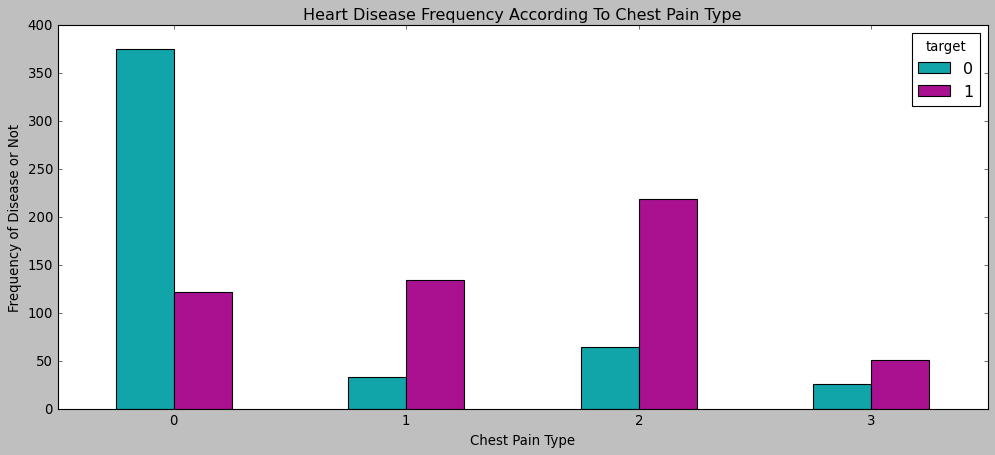

In [94]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# heart disease by age 

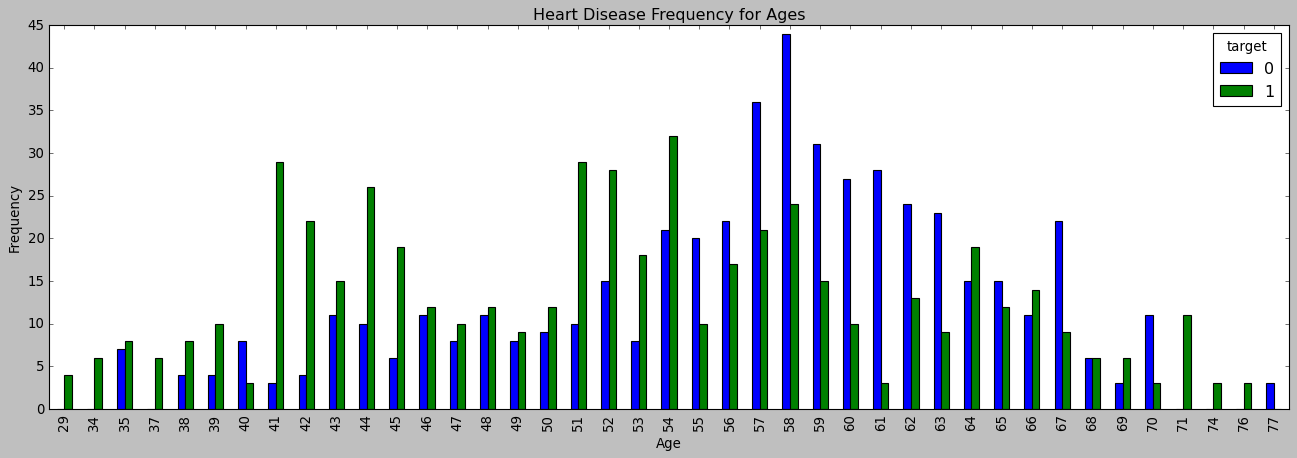

In [40]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

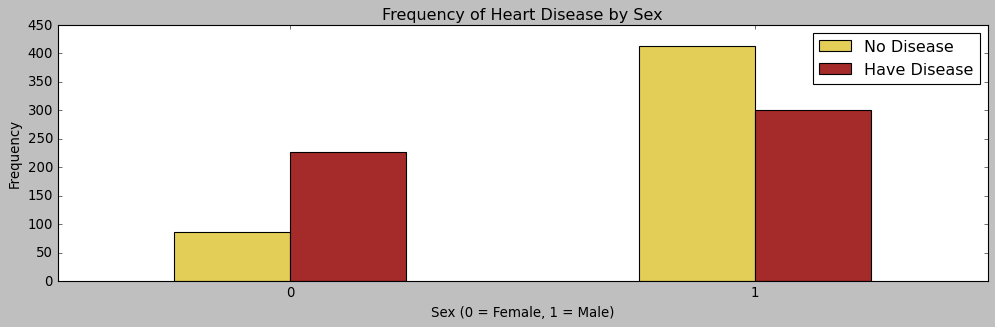

In [41]:
#calculate frequency of heart disease by sex
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,4),color=['#E3CF57', "#A52A2A" ])
plt.title('Frequency of Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

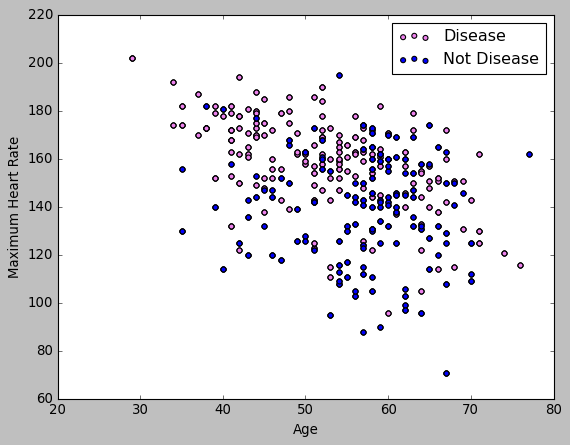

In [42]:
#calculate frequency of heart disease by Maximum heart rate
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="violet")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

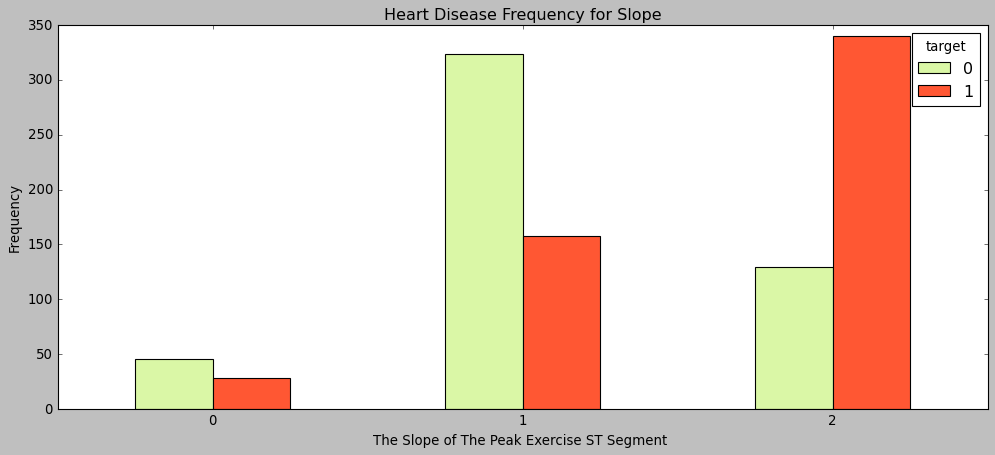

In [43]:
#calculate slope of ST segment 
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

# draw histogram 

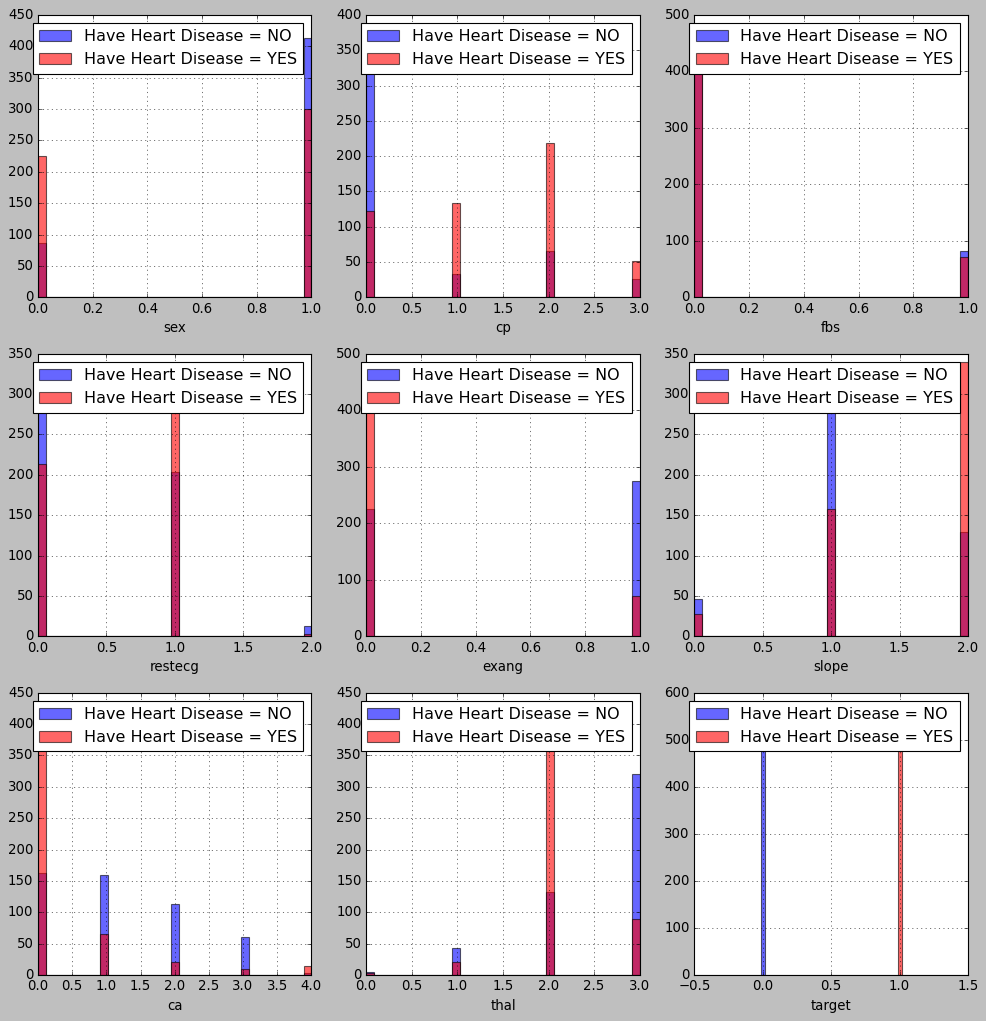

In [44]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

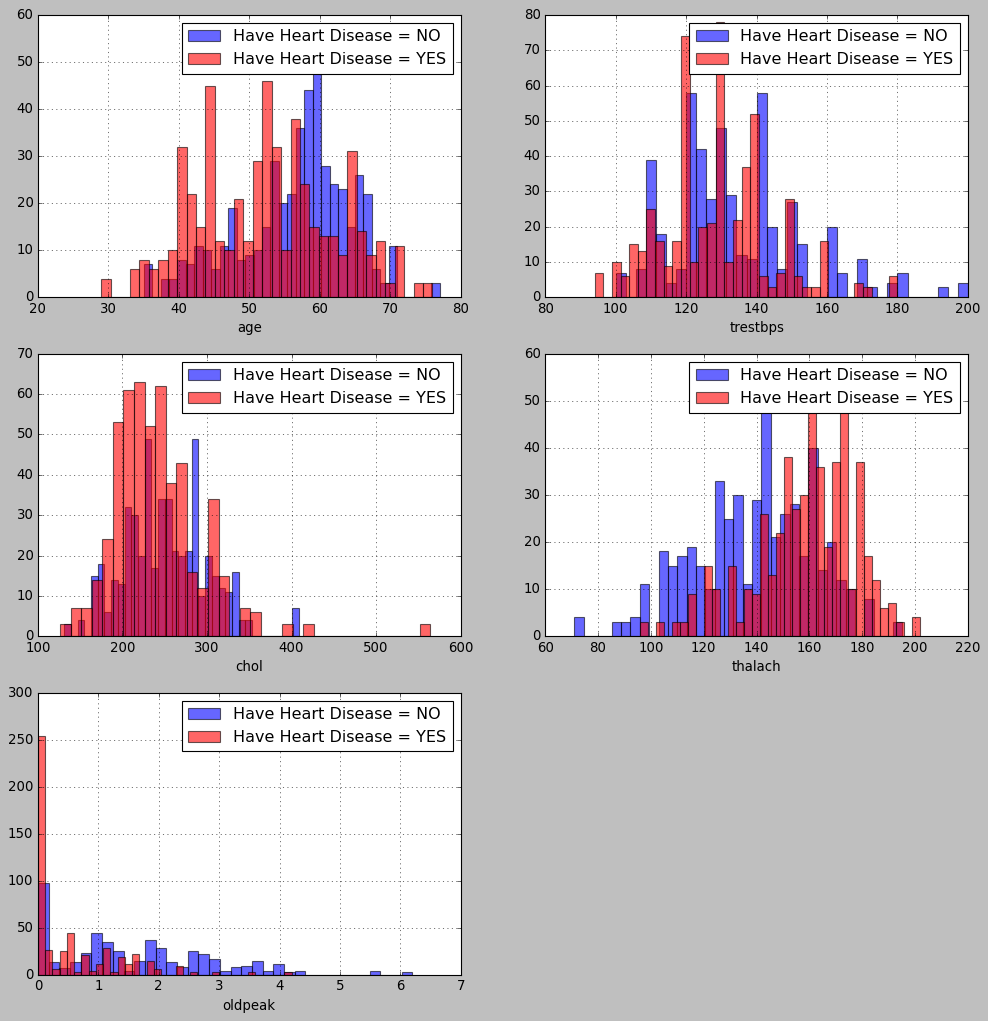

In [45]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP

(14.5, -0.5)

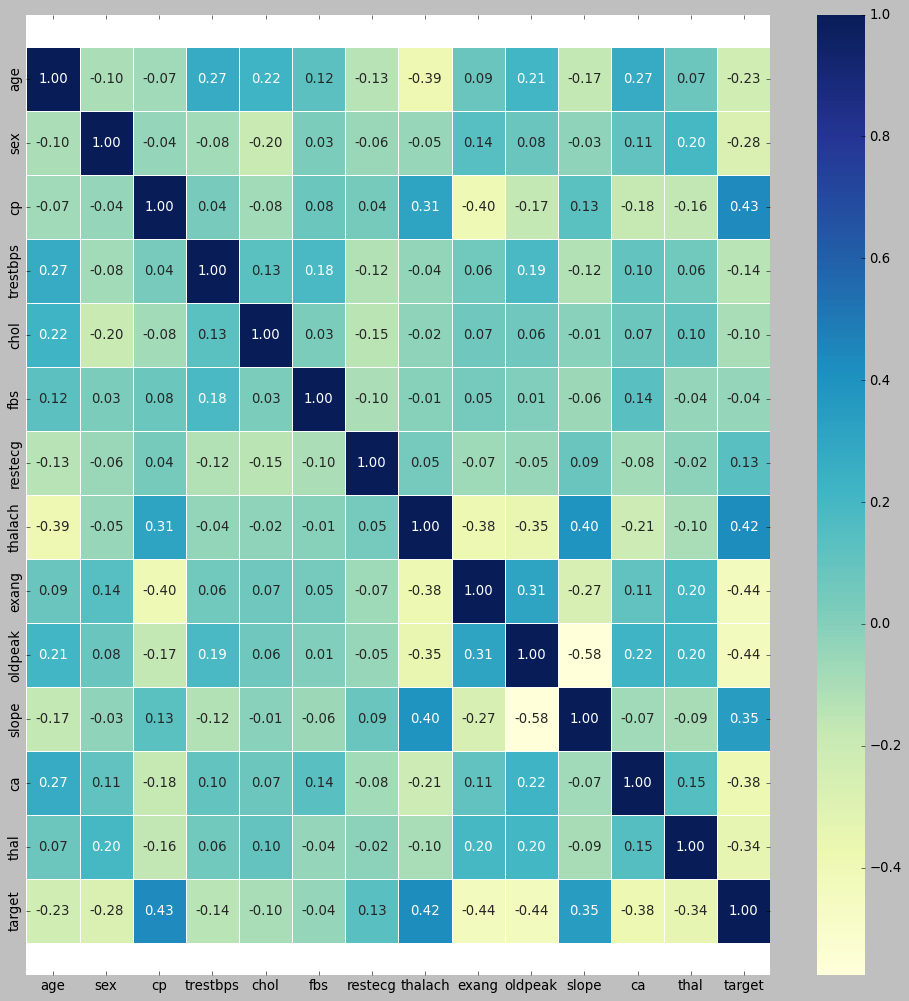

In [46]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# creating dummy variables 

In [95]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [96]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [97]:
print(data.columns)
print(dataset.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [98]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [99]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


# model building 

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [103]:
        
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.907692    0.885204  0.895397    0.896448      0.895868
recall       0.867647    0.920424  0.895397    0.894036      0.895397
f1-score     0.887218    0.902471  0.895397    0.894844      0.895238
support    340.000000  377.000000  0.895397  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[295  45]
 [ 30 347]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.850340    0.788820  0.818182    0.819580      0.820579
recall       0.786164    0.852349  0.818182    0.819256      0.818182
f1-score     0.816993    0.819355  0.818182    0.818174      0.818136
support    159.000000  149.000000  0.818182  308.000000    308.

In [105]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182


# K-nearest neighbour

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.914454    0.920635  0.917713    0.917545      0.917704
recall       0.911765    0.923077  0.917713    0.917421      0.917713
f1-score     0.913108    0.921854  0.917713    0.917481      0.917707
support    340.000000  377.000000  0.917713  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[310  30]
 [ 29 348]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.860140    0.781818  0.818182    0.820979      0.822250
recall       0.773585    0.865772  0.818182    0.819678      0.818182
f1-score     0.814570    0.821656  0.818182    0.818113      0.817998
support    159.000000  149.000000  0.818182  308.000000    308.

In [107]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182
1,K-nearest neighbors,91.771269,81.818182


# Support vector machine 

In [108]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.969419    0.941026  0.953975    0.955222      0.954490
recall       0.932353    0.973475  0.953975    0.952914      0.953975
f1-score     0.950525    0.956975  0.953975    0.953750      0.953916
support    340.000000  377.000000  0.953975  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[317  23]
 [ 10 367]]

Test Result:
Accuracy Score: 90.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.944828    0.865031  0.902597    0.904929      0.906225
recall       0.861635    0.946309  0.902597    0.903972      0.902597
f1-score     0.901316    0.903846  0.902597    0.902581      0.902540
support    159.000000  149.000000  0.902597  308.000000    308.

In [109]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182
1,K-nearest neighbors,91.771269,81.818182
2,Support Vector Machine,95.397490,90.259740


# decision tree


In [110]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946429    1.000000  0.970779    0.973214      0.972345
recall       1.000000    0.939597  0.970779    0.969799      0.970779
f1-score     0.972477    0.968858  0.970779    0.970668      0.970726
support    159.000000  149.000000  0.970779  308.000000    308.000000
_______________________________________________

In [111]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182
1,K-nearest neighbors,91.771269,81.818182
2,Support Vector Machine,95.397490,90.259740
3,Decision Tree Classifier,100.000000,97.077922


# Random forest 

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.963636    1.000000  0.980519    0.981818      0.981228
recall       1.000000    0.959732  0.980519    0.979866      0.980519
f1-score     0.981481    0.979452  0.980519    0.980467      0.980500
support    159.000000  149.000000  0.980519  308.000000    308.000000
_______________________________________________

In [113]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182
1,K-nearest neighbors,91.771269,81.818182
2,Support Vector Machine,95.397490,90.259740
3,Decision Tree Classifier,100.000000,97.077922
4,Random Forest Classifier,100.000000,98.051948


# conclusion
The project involved analysis of the heart disease patient dataset with proper data processing. Then, 5 models were trained 
and tested with maximum scores as follows:
1       Logistic Regression                       81.818182
2       K-nearest neighbors                       81.818182
3  Decision Tree Classifier                      97.077922
4  Random Forest Classifier                      98.051948
5    Support Vector Machine                       90.259740
    
Random Forest Classifier scored the best score of 98%.